**Title:** Fraud Detection in Financial Transactions Using Machine Learning

**Objective:**

Develop a robust fraud detection system leveraging machine learning techniques to identify fraudulent transactions within financial datasets. The system should efficiently detect anomalies and potentially fraudulent activities to mitigate financial losses and enhance security.

**Background:**

Financial fraud is a significant issue for institutions and consumers alike. With the increasing volume of online transactions, it becomes imperative to have automated systems that can identify and flag fraudulent transactions in real-time. Traditional methods of fraud detection often fall short due to the evolving nature of fraudulent techniques. Therefore, machine learning-based systems are essential for their ability to learn from historical data and identify patterns indicative of fraud.

**IMPORTING** **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pylab import rcParams
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter

In [2]:
# Setting plot parameters
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

**The Exploratory Data Analysis (EDA) **

In [3]:
# Load the dataset
file_path = '/content/creditcard_2023.csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12882 non-null  int64  
 1   V1      12882 non-null  float64
 2   V2      12882 non-null  float64
 3   V3      12882 non-null  float64
 4   V4      12882 non-null  float64
 5   V5      12882 non-null  float64
 6   V6      12882 non-null  float64
 7   V7      12882 non-null  float64
 8   V8      12882 non-null  float64
 9   V9      12882 non-null  float64
 10  V10     12882 non-null  float64
 11  V11     12882 non-null  float64
 12  V12     12882 non-null  float64
 13  V13     12882 non-null  float64
 14  V14     12882 non-null  float64
 15  V15     12882 non-null  float64
 16  V16     12882 non-null  float64
 17  V17     12882 non-null  float64
 18  V18     12882 non-null  float64
 19  V19     12882 non-null  float64
 20  V20     12882 non-null  float64
 21  V21     12882 

In [5]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26 

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
V28       1
Amount    1
Class     1
dtype: int64


In [7]:
#Drop rows with missing values in 'Class'
df.dropna(subset=['Class'], inplace=True)

In [8]:
# Standardizing the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [9]:
# Dropping the 'Time' column if it exists
if 'Time' in df.columns:
    df = df.drop(['Time'], axis=1)

In [10]:
# Display the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (12881, 31)


In [11]:
# Display the distribution of the 'Class' column
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0.0    12825
1.0       56
Name: count, dtype: int64


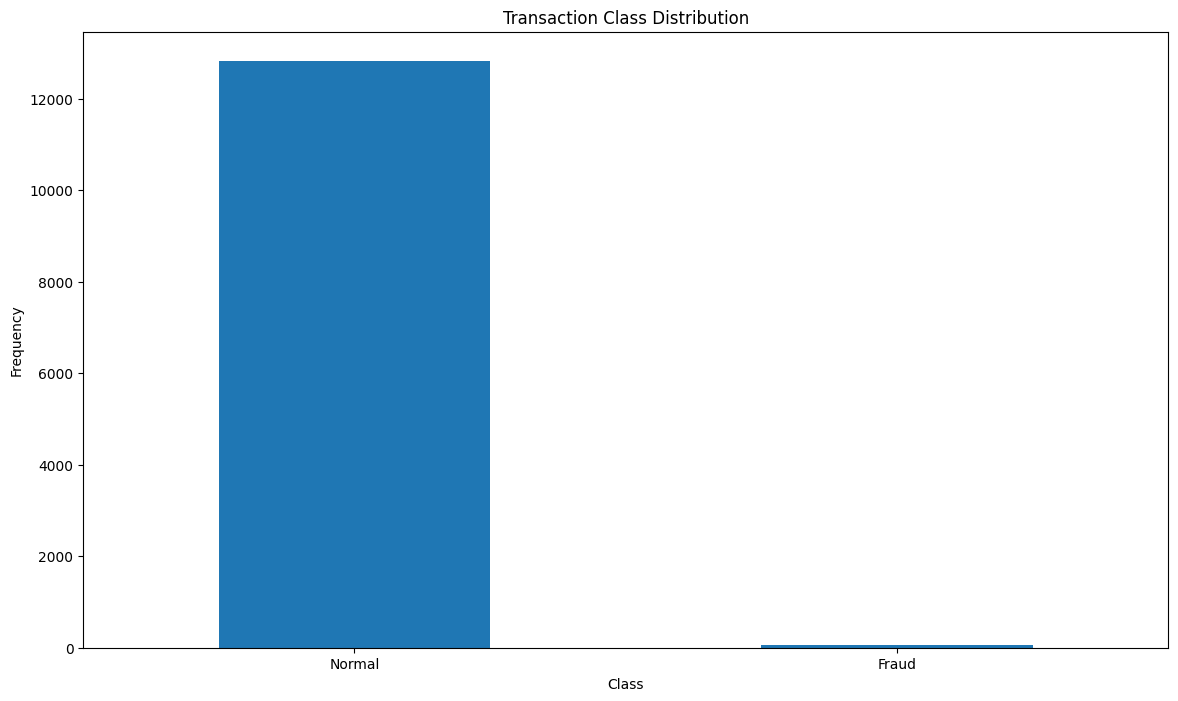

In [12]:
# Plot the distribution of the 'Class' column
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Create independent and dependent features
columns = [c for c in df.columns if c != "Class"]
X = df[columns]
Y = df['Class']

In [14]:
# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (12881, 30)
Shape of Y: (12881,)


In [15]:
# Get the Fraud and Normal datasets
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
print(fraud.shape, normal.shape)

(56, 31) (12825, 31)


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Implementing Oversampling for Handling Imbalanced Data
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, Y)
print("Shape of X_res:", X_res.shape)
print("Shape of y_res:", y_res.shape)

Shape of X_res: (25602, 30)
Shape of y_res: (25602,)


In [18]:
# Display the distribution of the resampled dataset
print('Original dataset shape:', Counter(Y))
print('Resampled dataset shape:', Counter(y_res))

Original dataset shape: Counter({0.0: 12825, 1.0: 56})
Resampled dataset shape: Counter({0.0: 12801, 1.0: 12801})


In [19]:
#Feature scaling
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

TRAINING MODEL

**LOGISTIC** **REGRESSION** **MODEL**

In [20]:
# Initialize a dictionary to store the accuracies of each model
model_accuracies = {}

In [21]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_res, y_res)

LogisticRegression()

In [22]:
# Predict on the test set
y_pred_lr = log_reg.predict(X_test)

In [23]:
# Evaluate the model
model_accuracies['LR'] = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', model_accuracies['LR'])

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred_lr)
print('Classification Report:')
print(class_report)

Logistic Regression Accuracy: 0.9945673263484672
Confusion Matrix:
[[2555   14]
 [   0    8]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2569
         1.0       0.36      1.00      0.53         8

    accuracy                           0.99      2577
   macro avg       0.68      1.00      0.77      2577
weighted avg       1.00      0.99      1.00      2577



In [24]:
!pip install scikit-learn imbalanced-learn

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**k-Nearest Neighbors (k-NN)**

In [26]:
# Train k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_res, y_res)

KNeighborsClassifier()

In [27]:
# Predict
y_pred_knn = knn.predict(X_test)

In [28]:
# evaluate
model_accuracies['k-NN'] = accuracy_score(y_test, y_pred_knn)
print('k-NN Accuracy:', model_accuracies['k-NN'])

print('k-NN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))
print('k-NN Classification Report:')
print(classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.9988358556461001
k-NN Confusion Matrix:
[[2566    3]
 [   0    8]]
k-NN Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2569
         1.0       0.73      1.00      0.84         8

    accuracy                           1.00      2577
   macro avg       0.86      1.00      0.92      2577
weighted avg       1.00      1.00      1.00      2577



**Decision Trees**

In [29]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)

DecisionTreeClassifier(random_state=42)

In [30]:
# Predict
y_pred_dt = dt.predict(X_test)

In [31]:
# evaluate
model_accuracies['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', model_accuracies['Decision Tree'])

print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[2569    0]
 [   0    8]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2569
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00      2577
   macro avg       1.00      1.00      1.00      2577
weighted avg       1.00      1.00      1.00      2577



**Naive Bayes**

In [32]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_res, y_res)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)

model_accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)
print('Naive Bayes Accuracy:', model_accuracies['Naive Bayes'])
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9918509895227008
Naive Bayes Confusion Matrix:
[[2549   20]
 [   1    7]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2569
         1.0       0.26      0.88      0.40         8

    accuracy                           0.99      2577
   macro avg       0.63      0.93      0.70      2577
weighted avg       1.00      0.99      0.99      2577



**Support Vector Machine (SVM)**

In [33]:
# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_res, y_res)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)

model_accuracies['SVM'] = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', model_accuracies['SVM'])
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9941792782305006
SVM Confusion Matrix:
[[2554   15]
 [   0    8]]
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2569
         1.0       0.35      1.00      0.52         8

    accuracy                           0.99      2577
   macro avg       0.67      1.00      0.76      2577
weighted avg       1.00      0.99      1.00      2577



**COMPARING THE MODELS**

In [34]:
import matplotlib.pyplot as plt

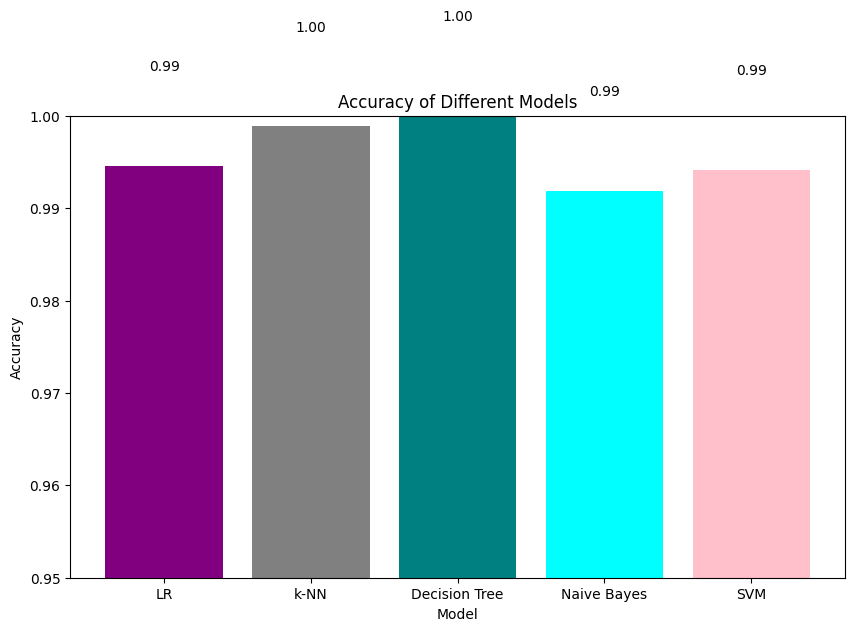

In [35]:
# Plot the accuracies in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['purple', 'gray', 'teal', 'cyan','pink'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.95, 1.0)  # Set the y-axis limits to be between 0 and 1
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In this project, we explored the performance of several classification algorithms, namely **Logistic Regression, k-Nearest Neighbors (k-NN), Decision Trees, Naive Bayes, and Support Vector Machines (SVM),** on a binary classification problem using the Kaggle credit card dataset. To handle the class imbalance in the dataset, we applied the SMOTETomek technique, which combines both oversampling of the minority class and undersampling of the majority class. This preprocessing step ensured a more balanced training dataset, allowing the classifiers to perform more effectively.

We evaluated each model using several metrics, including accuracy, confusion matrix, and classification report (precision, recall, and F1-score).

Among the four models evaluated, the **Decision Tree classifier** achieved the highest accuracy. This suggests that the Decision Tree model was able to capture the underlying patterns in the data more effectively than the other models. The Decision Tree classifier's accuracy, combined with its relatively simple interpretability, makes it a strong candidate for this classification problem.

The bar graph below visually compares the accuracy of each model, reinforcing the conclusion that the Decision Tree model outperforms the others in terms of accuracy.

**Future Work**

For future work, it would be beneficial to explore other advanced techniques and algorithms, such as ensemble methods (e.g., Random Forest, Gradient Boosting) and neural networks, to see if they can further improve the classification performance. Additionally, fine-tuning the hyperparameters of each model could yield better results.

Furthermore, applying these models to a more complex and larger dataset could provide additional insights into their robustness and scalability. Continual assessment and validation with different datasets and more extensive cross-validation techniques would help in building a more generalized and reliable classification model.